<a href="https://colab.research.google.com/github/shaharao-rushikesh/News_api/blob/main/task_news_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK:

Take any newspaper data through their API and classify the sentiment within the articles. Find the topic of the article and the sentiment

<center><img src = 'https://www.parsintl.com/wp-content/uploads/2022/01/NYT-logo.jpg'>

**Top Stories** API by NYT 
*     To get headlines of articles on Home page 
*     Replace API key with your actual key



In [8]:
import requests

# Replace YOUR_API_KEY with your actual API key
api_key = "api_key"

# Set the section you want to retrieve headlines from
section = "home"

# Send the request to the API endpoint
response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={api_key}")

# Check for a successful response
if response.status_code == 200:
    # Load the response data into a JSON object
    data = response.json()

    # Print the headline for each article
    for article in data["results"]:
        print(article["title"])
else:
    print("Something went wrong")


U.S. Aid Is ‘Not Charity,’ Zelensky Tells Congress as a Lengthy War Looms
As Ukraine Prepares for a Second Year at War, the Prospect of a Stalemate Looms
Putin Concedes Military Failings, but Insists Russia Will Fight On
I.R.S. Routinely Audited Obama and Biden, Raising Questions Over Delays for Trump
Trump’s Taxes: Red Flags, Big Losses and a Windfall From His Father
Here Are the Key Numbers From Trump’s Tax Returns
As Winter Storm Forecasts Grow Ominous, Millions Brace for the Worst
What to Know if the Winter Storm Wreaks Havoc on Your Holiday Travel
Two Executives in Sam Bankman-Fried’s Crypto Empire Plead Guilty to Fraud
Coalition Deal Puts Netanyahu on Brink of Power in Israel
Lawmakers Steer Home More Than $15 Billion in Pet Projects
A Common Answer to Jan. 6 Panel Questions: The Fifth
Elon Musk’s Distraction Is Just One of Tesla’s Problems
Frank James to Plead Guilty to Terror Counts in Brooklyn Subway Shooting
Onstage, It’s Finally Beginning to Look a Lot Like Christmas Again
T

Getting Heading, Section of news, Description of news(Abstract) and availabel multimedia in the article 

In [9]:
import requests
from IPython.display import Markdown

# Replace YOUR_API_KEY with your actual API key
api_key = "api_key"

# Set the section you want to retrieve headlines from
section = "home"

# Send the request to the API endpoint
response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={api_key}")

# Check for a successful response
if response.status_code == 200:
    # Load the response data into a JSON object
    data = response.json()

    # Print the headline and description for each article
    for article in data["results"]:

        print(article["title"])
        print(article["section"])
        
        print(article["abstract"])
        # print(article["multimedia"])   ##to get images

        print()
else:
    print("Something went wrong")


U.S. Aid Is ‘Not Charity,’ Zelensky Tells Congress as a Lengthy War Looms
us
President Volodymyr Zelensky described military assistance for Ukraine as an investment in global security and democracy in the face of Russian aggression.

As Ukraine Prepares for a Second Year at War, the Prospect of a Stalemate Looms
us
American officials believe that with Russia bolstering defenses and learning lessons, Ukraine will find it more challenging to retake land.

Putin Concedes Military Failings, but Insists Russia Will Fight On
world
Nodding to criticism that his army lacked the basic necessities to wage war, the Russian leader said his government was providing “everything that the army asks for.’’

I.R.S. Routinely Audited Obama and Biden, Raising Questions Over Delays for Trump
us
The revelation that the agency had not audited Donald J. Trump during his first two years in office despite a mandatory presidential audit program raised concerns about potential politicization.

Trump’s Taxes: Red 

**Archives API** by NYT
* will print the metadata of records from 2nd week of November 2018
* Metadata will be - Headline, Byline, Section name, document type, type of material and source
* Replace api key with actual api key

In [10]:
import requests

# Set the API key
api_key = "api_key"

# Set the base URL for the API
base_url = "https://api.nytimes.com/svc/archive/v1/2018/11.json"

# Set the parameters for the API request
params = {
    "api-key": api_key
}

# Send the request to the API
response = requests.get(base_url, params=params)

# Check the status code of the response
if response.status_code == 200:
    # If the request is successful, get the data from the response
    data = response.json()
    # Get the list of articles from the data
    articles = data["response"]["docs"]
    # Iterate through the list of articles
    for article in articles:
        # Get the publication date of the article
        pub_date = article["pub_date"]
        # Check if the article was published in the second week of November 2018
        if pub_date >= "2018-11-05" and pub_date < "2018-11-12":
            # Print the metadata for the article
            print(article["headline"]["main"])
            print(article["byline"]["original"])
            print(article["section_name"])
            print(article["document_type"])
            print(article["type_of_material"])
            print(article["source"])
            print()
else:
    # If the request is not successful, print an error message
    print("An error occurred:", response.status_code)


Streaming output truncated to the last 5000 lines.
The New York Times

Oh Brother. Duke Is Really, Really Good.
By Victor Mather
Sports
article
News
The New York Times

In Indonesia Plane Crash Inquiry, New Focus on Possible Aircraft Problems
By Hannah Beech and Keith Bradsher
World
article
News
The New York Times

Mediterranean Style on the Island of Capri

Real Estate
multimedia
Slideshow
The New York Times

House Hunting in … Italy
By Kevin Brass
Real Estate
article
News
The New York Times

Trump Says He Will Not Meet Putin This Weekend, Contradicting the Kremlin
By Peter Baker
U.S.
article
News
The New York Times

A 92-Year-Old Composer’s First Opera Is His ‘Endgame’
By Palko Karasz
Arts
article
News
The New York Times

Thanksgiving Deer Hunt? Sounds Like a Great Time to Talk to the Kids About Guns
By Philip Galanes
Style
article
News
The New York Times

Inside the Designer Nadia Olive Schnack’s Colorful Home

T Magazine
multimedia
Slideshow
The New York Times

This Danish Designer

## Function for **Sentiment**

In [3]:
# sentiments

from textblob import TextBlob

def classify_sentiment(text):
    # Create a TextBlob object from the text
    text_blob = TextBlob(text)
    # Get the sentiment of the text
    sentiment = text_blob.sentiment.polarity
    # Classify the sentiment as positive, negative, or neutral
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"




## Printing
* Headline
* Topic of Article 
* Abstract 
* Sentiment of Article

In [11]:
import requests
from IPython.display import Markdown, display

# Replace YOUR_API_KEY with your actual API key
api_key = "api_key"

# Set the section you want to retrieve headlines from
section = "home"

# Send the request to the API endpoint
response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={api_key}")

# Check for a successful response
if response.status_code == 200:
    # Load the response data into a JSON object
    data = response.json()

    # Print the headline and description for each article
    for article in data["results"]:

        display(Markdown("**HEADLINE**"))
        print(article["title"])
        display(Markdown("**TOPIC OF THE ARTICLE**"))
        print(article["section"])
        display(Markdown("**ABSTRACT**"))
        print(article["abstract"])
        display(Markdown("**SENTIMENT OF THE ARTICLE**"))
        print(classify_sentiment(article["abstract"]))
        # print(article["multimedia"])   ##to get images

        print()
else:
    print("Something went wrong")

**HEADLINE**

U.S. Aid Is ‘Not Charity,’ Zelensky Tells Congress as a Lengthy War Looms


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

President Volodymyr Zelensky described military assistance for Ukraine as an investment in global security and democracy in the face of Russian aggression.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

As Ukraine Prepares for a Second Year at War, the Prospect of a Stalemate Looms


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

American officials believe that with Russia bolstering defenses and learning lessons, Ukraine will find it more challenging to retake land.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Putin Concedes Military Failings, but Insists Russia Will Fight On


**TOPIC OF THE ARTICLE**

world


**ABSTRACT**

Nodding to criticism that his army lacked the basic necessities to wage war, the Russian leader said his government was providing “everything that the army asks for.’’


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

I.R.S. Routinely Audited Obama and Biden, Raising Questions Over Delays for Trump


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

The revelation that the agency had not audited Donald J. Trump during his first two years in office despite a mandatory presidential audit program raised concerns about potential politicization.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Trump’s Taxes: Red Flags, Big Losses and a Windfall From His Father


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

The presidency of Donald J. Trump, a congressional report reveals, was marked by some of the same questionable tax maneuvers that had characterized his business career.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Here Are the Key Numbers From Trump’s Tax Returns


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

Donald J. Trump paid $1.1 million in federal income taxes in his first three years as president, and paid no taxes in 2020 as his income began to dwindle.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

As Winter Storm Forecasts Grow Ominous, Millions Brace for the Worst


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

Much of the country faces dangerous conditions, including heavy snow, strong winds and steep temperature drops. In Buffalo, meteorologists warned of a “once-in-a-generation storm.”


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

What to Know if the Winter Storm Wreaks Havoc on Your Holiday Travel


**TOPIC OF THE ARTICLE**

travel


**ABSTRACT**

Forecasters say a “bomb cyclone” will tear through much of the U.S. this week and that travelers could face cold, snow and rain. What can you do if your plans are disrupted?


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Two Executives in Sam Bankman-Fried’s Crypto Empire Plead Guilty to Fraud


**TOPIC OF THE ARTICLE**

technology


**ABSTRACT**

Caroline Ellison, the former chief executive of Alameda Research, and Gary Wang, a founder of FTX, are cooperating in the federal criminal case against Mr. Bankman-Fried.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Coalition Deal Puts Netanyahu on Brink of Power in Israel


**TOPIC OF THE ARTICLE**

world


**ABSTRACT**

After weeks of talks, Benjamin Netanyahu said he had formed a new governing coalition. Once ratified by Parliament, the deal will return him to power at the head of a hard-right alliance.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Lawmakers Steer Home More Than $15 Billion in Pet Projects


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

The $1.7 trillion spending bill moving through Congress contains more than 7,200 earmarks for projects in lawmakers’ home states and districts.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

A Common Answer to Jan. 6 Panel Questions: The Fifth


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

Transcripts released by the House Jan. 6 committee showed nearly two dozen witnesses invoking their right against self-incrimination, underscoring the hurdles to the investigation.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Elon Musk’s Distraction Is Just One of Tesla’s Problems


**TOPIC OF THE ARTICLE**

business


**ABSTRACT**

The maker of electric cars faces sharp competition, plummeting shares and production woes while its chief executive is preoccupied with Twitter.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Frank James to Plead Guilty to Terror Counts in Brooklyn Subway Shooting


**TOPIC OF THE ARTICLE**

nyregion


**ABSTRACT**

Mr. James told his lawyers he wants to admit to the April attack on the N train, which shook the city and set off a manhunt.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Onstage, It’s Finally Beginning to Look a Lot Like Christmas Again


**TOPIC OF THE ARTICLE**

theater


**ABSTRACT**

After one holiday season lost to the pandemic and another curtailed by Omicron, seasonal staples including “The Nutcracker,” “A Christmas Carol” and “Messiah” are back in force.


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

The Americanization of Religion


**TOPIC OF THE ARTICLE**

opinion


**ABSTRACT**

When does a nation of heretics leave it’s a Christian origins behind?


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Women Are on the March


**TOPIC OF THE ARTICLE**

opinion


**ABSTRACT**

Fewer men are filling governors’ mansions. Not few enough.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

400 Million Guns Aren’t Going to Just Go Away. In San Jose, We’re Trying Something New.


**TOPIC OF THE ARTICLE**

opinion


**ABSTRACT**

It will require gun owners to carry insurance and pay an annual fee that will fund violence prevention efforts.


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

Gods Don’t Bleed. Trump is Bleeding.


**TOPIC OF THE ARTICLE**

opinion


**ABSTRACT**

Where some Republicans once saw invincibility, they now sense weakness and injury.


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

Faces Quiz: Do You Recognize These Notable People of 2022?


**TOPIC OF THE ARTICLE**

briefing


**ABSTRACT**

See how well you know the defining personalities of 2022 with The New York Times Faces Quiz.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Will It Latke?


**TOPIC OF THE ARTICLE**

dining


**ABSTRACT**

Potato, squash, cabbage, celery root, parsnips, carrots — yes, you can fry them all!


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

The Critics’ Picks: A Year in Reading


**TOPIC OF THE ARTICLE**

books


**ABSTRACT**

New York Times book critics discuss their favorite books and memorable reading experiences of 2022.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Help us map New York City’s neighborhoods.


**TOPIC OF THE ARTICLE**

upshot


**ABSTRACT**

We’re attempting to create a reader-sourced map of neighborhood boundaries.


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

In Testimony, Hannity and Other Fox Employees Said They Doubted Trump’s Fraud Claims


**TOPIC OF THE ARTICLE**

business


**ABSTRACT**

On Wednesday, lawyers for Dominion Voting Systems shared some of the strongest evidence yet that some Fox employees knew what they broadcast about the claims was false.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Did George Santos Also Mislead Voters About His Jewish Descent?


**TOPIC OF THE ARTICLE**

nyregion


**ABSTRACT**

Genealogy websites cited by The Forward suggest that Mr. Santos’s grandparents were born in Brazil and were not “Holocaust refugees,” as he has claimed.


**SENTIMENT OF THE ARTICLE**

neutral



**HEADLINE**

Along the Border, Waiting Anxiously for the End of a Pandemic-Era Rule


**TOPIC OF THE ARTICLE**

us


**ABSTRACT**

A tense limbo pervaded both sides of the border on Wednesday as people waited for the end of a policy that has restricted immigration during the pandemic.


**SENTIMENT OF THE ARTICLE**

negative



**HEADLINE**

Franco Harris, Steeler Who Caught ‘Immaculate Reception,’ Dies at 72


**TOPIC OF THE ARTICLE**

sports


**ABSTRACT**

A Hall of Fame running back, he died days before the 50th anniversary of one of the most memorable plays in N.F.L. history.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

‘Women Talking’ and What a Post-#MeToo Future Looks Like


**TOPIC OF THE ARTICLE**

movies


**ABSTRACT**

The director Sarah Polley and cast members Claire Foy and Rooney Mara dig into thorny issues raised by their new film, a drama based on sexual assaults in a Mennonite sect.


**SENTIMENT OF THE ARTICLE**

positive



**HEADLINE**

Few Wordle Players Use Consistent Starting Words, but When They Do, It’s ADIEU


**TOPIC OF THE ARTICLE**

crosswords


**ABSTRACT**

What the data tells us about how people play the game.


**SENTIMENT OF THE ARTICLE**

negative



In [ ]:
import warnings
warnings.simplefilter("ignore", "always")

In [ ]:
# Try topic by different method
# count positive neagtive news

In [ ]:
!pip install transformers --quiet

## Counting Sentiments From Top Stories

In [14]:
import requests
api_key = "api_key"

# Set the section you want to retrieve headlines from
section = "home"

# Send the request to the API endpoint
response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={api_key}")

# Check for a successful response
if response.status_code == 200:
    # Load the response data into a JSON object
    data = response.json()

    # Print the headline and description for each article
    sentims = []
    for article in data["results"]:
        a = (classify_sentiment(article["abstract"]))
        sentims.append(a)
        # print(article["multimedia"])   ##to get images
else:
    print("Something went wrong")

In [15]:
sentims

['negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative']

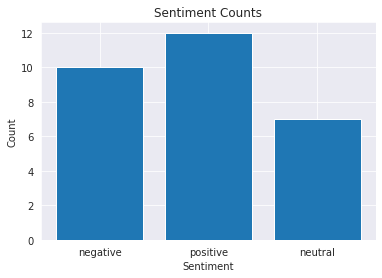

In [16]:
import matplotlib.pyplot as plt
import numpy as np

sentiment_counts = {}
for sentiment in sentims:
    sentiment_counts[sentiment] = sentims.count(sentiment)

plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


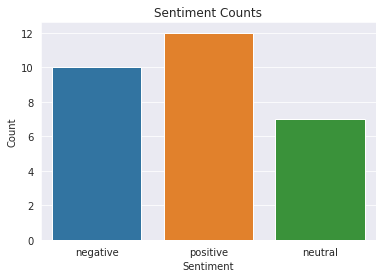

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = {}
for sentiment in sentims:
    sentiment_counts[sentiment] = sentims.count(sentiment)

sns.set_style("darkgrid")
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
